In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/MAYANK YADAV/OneDrive/Documents/DA Projects/Telco Churn Analysis/Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replacing blanks as 0, as Tenure is 0 so no Total Charges are recorded for that.

In [4]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df["customerID"].duplicated().sum()

np.int64(0)

#Converting 0 and 1 values of senior citizen to Yes/No to make it easier to understand.

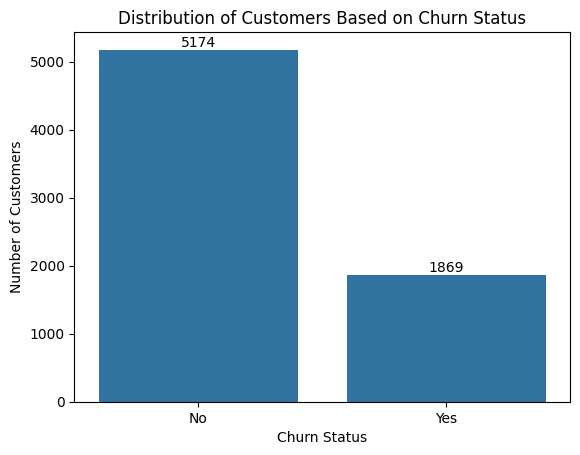

In [9]:
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Distribution of Customers Based on Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.show()

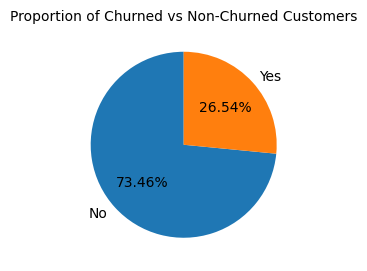

In [10]:
plt.figure(figsize=(3, 4))
gb = df.groupby("Churn").agg({'Churn': "count"})
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%", startangle=90)
plt.title("Proportion of Churned vs Non-Churned Customers", fontsize=10)
plt.show()

#From the given pie-chart, we can conclude that 26.54% of our customers have churned out.

Now let's explore the reason behind it!

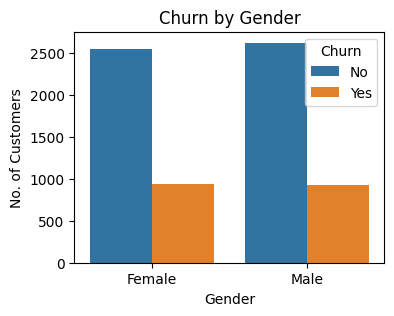

In [11]:
plt.figure(figsize = (4,3))
sns.countplot(x="gender", data=df, hue="Churn")
plt.title('Churn by Gender')
plt.ylabel('No. of Customers')
plt.xlabel('Gender')
plt.show()

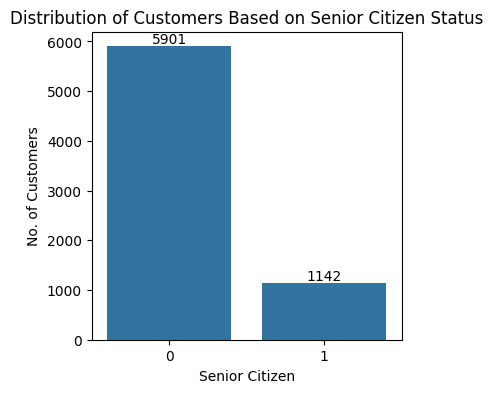

In [12]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x='SeniorCitizen', data=df)
ax.bar_label(ax.containers[0])
plt.xlabel('Senior Citizen')
plt.ylabel('No. of Customers')
plt.title('Distribution of Customers Based on Senior Citizen Status')
plt.show()

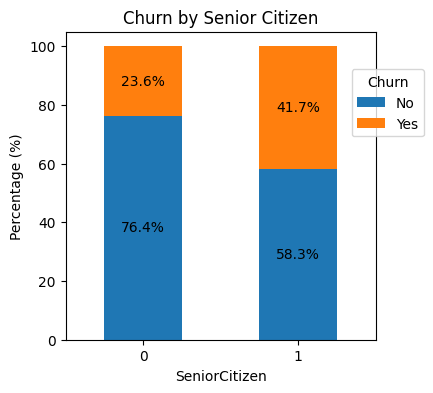

In [14]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

#Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

#Comparitvely a greater percentage of people in SeniorCitizen category have churned out.

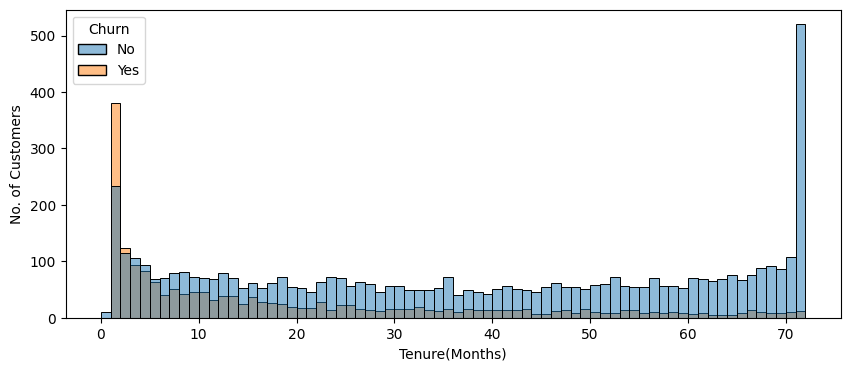

In [18]:
plt.figure(figsize=(10,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.xlabel('Tenure(Months)')
plt.ylabel('No. of Customers')
plt.show()

#People who have used our services for a long time have stayed and people who have used our sevices for 1 or 2 months have churned.

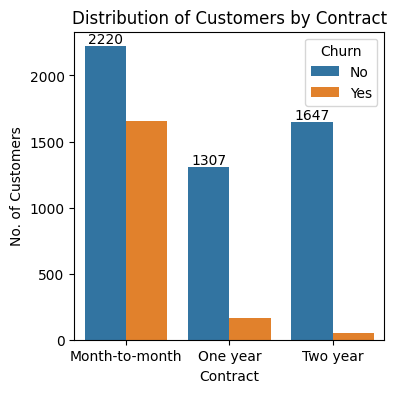

In [20]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Distribution of Customers by Contract")
plt.ylabel('No. of Customers')
plt.show()

In [21]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

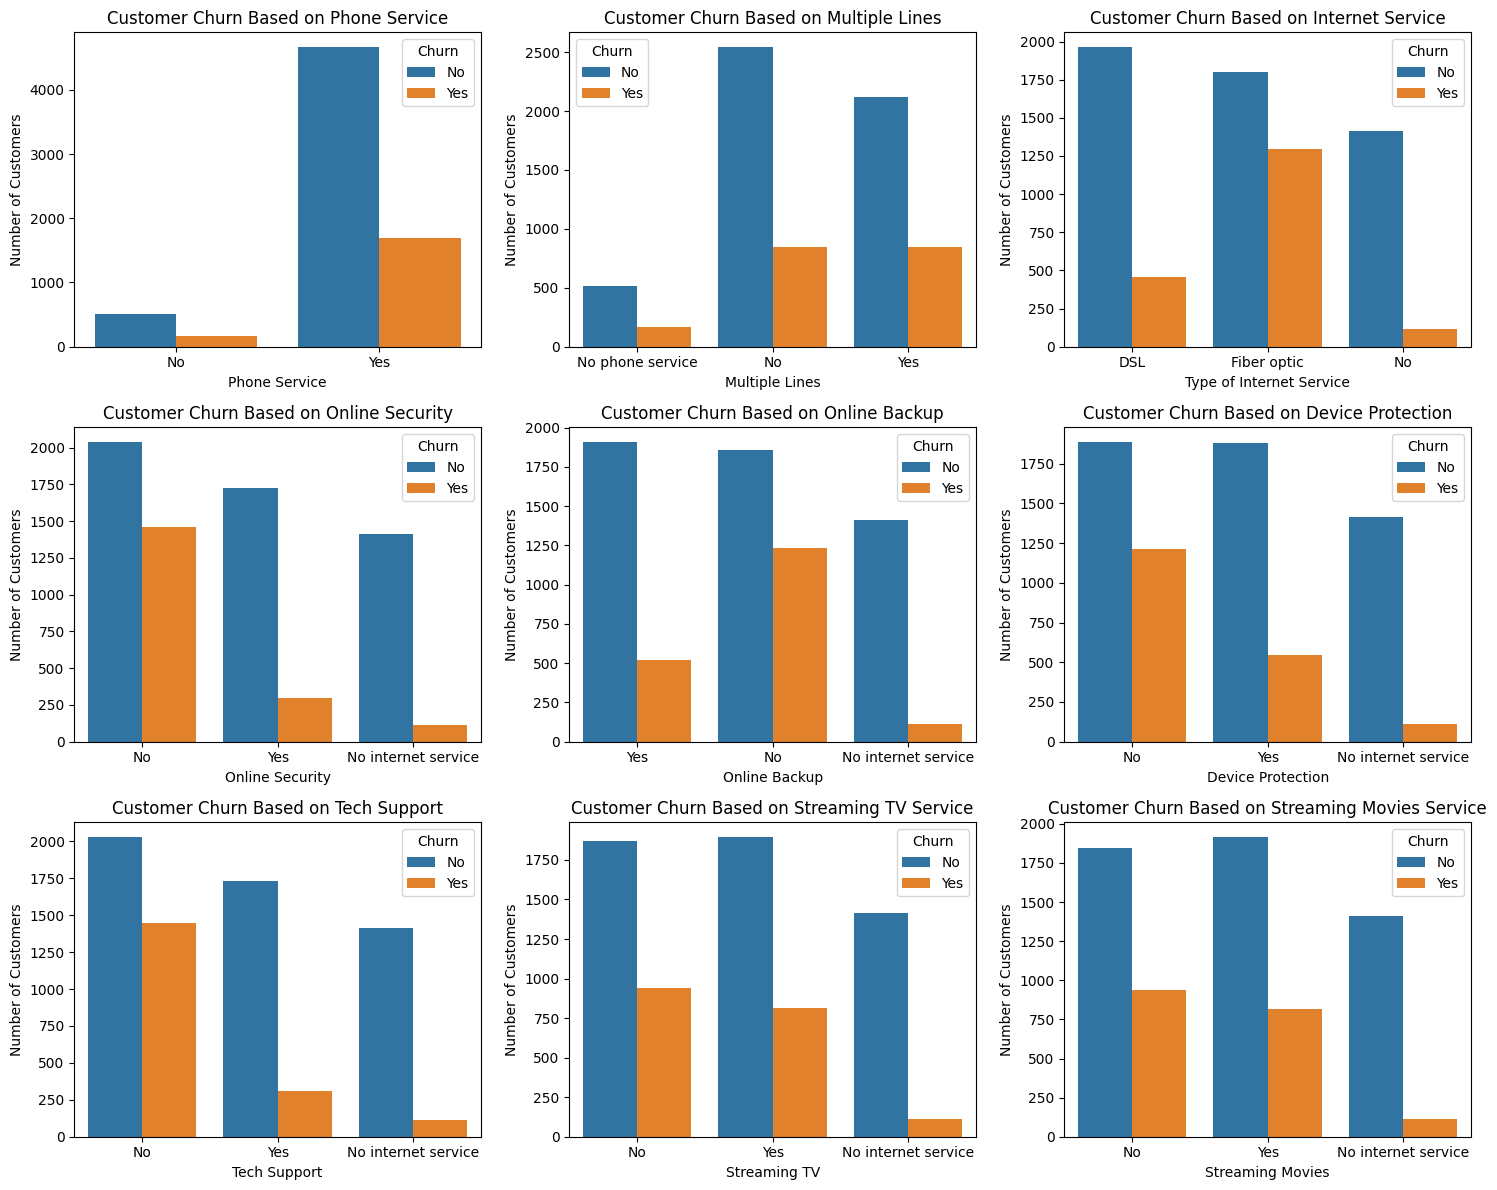

In [24]:
# List of columns to visualize
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots with flexible figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Dictionary of suggested titles and axis labels for each column
titles_and_labels = {
    'PhoneService': ("Customer Churn Based on Phone Service", "Phone Service", "Number of Customers"),
    'MultipleLines': ("Customer Churn Based on Multiple Lines", "Multiple Lines", "Number of Customers"),
    'InternetService': ("Customer Churn Based on Internet Service", "Type of Internet Service", "Number of Customers"),
    'OnlineSecurity': ("Customer Churn Based on Online Security", "Online Security", "Number of Customers"),
    'OnlineBackup': ("Customer Churn Based on Online Backup", "Online Backup", "Number of Customers"),
    'DeviceProtection': ("Customer Churn Based on Device Protection", "Device Protection", "Number of Customers"),
    'TechSupport': ("Customer Churn Based on Tech Support", "Tech Support", "Number of Customers"),
    'StreamingTV': ("Customer Churn Based on Streaming TV Service", "Streaming TV", "Number of Customers"),
    'StreamingMovies': ("Customer Churn Based on Streaming Movies Service", "Streaming Movies", "Number of Customers")
}

# Plot count plots for each column
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue=df["Churn"])  # hue for Churn category
    # Set title, xlabel, and ylabel using the dictionary
    axes[i].set_title(titles_and_labels[col][0])
    axes[i].set_xlabel(titles_and_labels[col][1])
    axes[i].set_ylabel(titles_and_labels[col][2])

# Remove any unused axes if columns < n_cols * n_rows
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


# Improve layout spacing
plt.tight_layout()

# Show the plots
plt.show()

#Customers who do not churn are more likely to have services such as PhoneService, DSL InternetService, and OnlineSecurity enabled. In contrast, churn rates tend to be higher among customers who do not use or have access to services like OnlineBackup, TechSupport, and StreamingTV.

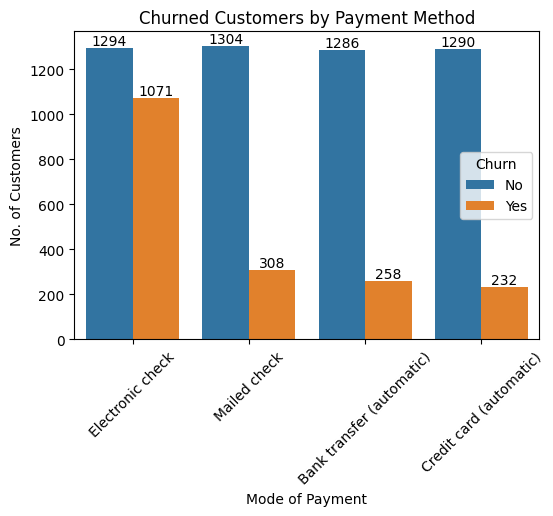

In [26]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.ylabel("No. of Customers")
plt.xlabel("Mode of Payment")
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

#Customer is likely to churn when he is using Electronic Check as a payment method.